In [1]:
import pandas as pd

In [2]:
# Series (estructura de datos unidimensional)
numeros = [3,4,5,6,7]

serie = pd.Series(numeros)

In [3]:
serie

0    3
1    4
2    5
3    6
4    7
dtype: int64

In [4]:
data = { 
  "Nombre" : ["Ana", "Juan", "Maria"],
  "Edad": [22,21,44],
  "Ciudad": ["Barcelona", "Madrid", "Valencia"]
}

df = pd.DataFrame(data)

df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,21,Madrid
2,Maria,44,Valencia


In [5]:
df.to_csv('../data/DataExported.csv')

In [6]:
df_exported = pd.read_csv("../data/DataExported.csv")
df_exported

,Unnamed: 0,Nombre,Edad,Ciudad
0,0,Ana,22,Barcelona
1,1,Juan,21,Madrid
2,2,Maria,44,Valencia


In [7]:
nombres = df["Nombre"]

nombres

0      Ana
1     Juan
2    Maria
Name: Nombre, dtype: object

In [8]:
columns = ["Nombre", "Edad"]
df[columns]

,Nombre,Edad
0,Ana,22
1,Juan,21
2,Maria,44


In [9]:
#Filtrar por indice
row = df.loc[2]
row

Nombre       Maria
Edad            44
Ciudad    Valencia
Name: 2, dtype: object

In [10]:
df[df["Edad"] > 22]

,Nombre,Edad,Ciudad
2,Maria,44,Valencia


In [11]:
filtro = (df["Edad"] >20) & (df["Nombre"].str.startswith("A"))
df[filtro]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona


In [12]:
df.query("Edad < 23")

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,21,Madrid


In [13]:
df[df["Nombre"].isin(["Ana", "Juan"])]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,21,Madrid


In [14]:
def longitud(nombre, longitud = 5):
  return len(nombre) == longitud

df[df["Nombre"].apply(longitud)]

,Nombre,Edad,Ciudad
2,Maria,44,Valencia


In [15]:
df[df["Edad"].between(21,22)]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,21,Madrid


In [16]:
import numpy as np

In [17]:
data = { 
  "Nombre" : ["Ana", "Juan", "Maria"],
  "Edad": [22, np.nan,44],
  "Ciudad": ["Barcelona", None, "Valencia"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,NaN,None
2,Maria,44.0,Valencia


In [18]:
df_fill = df.fillna(
  {
    "Edad" : df["Edad"].mean(),
    "Ciudad" : "Desconocido"
  }
)

df_fill

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,33.0,Desconocido
2,Maria,44.0,Valencia


In [19]:
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
2,Maria,44.0,Valencia


In [20]:
df_rem = df.replace(
  {
    "Ciudad": {None:"Desconocido"}
  }
)

df_rem

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,NaN,Desconocido
2,Maria,44.0,Valencia


In [21]:
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,33.0,None
2,Maria,44.0,Valencia


In [22]:
data_duplicada = { 
  "Nombre" : ["Ana", "Juan", "Maria", "Juan"],
  "Edad": [22, np.nan,44, np.nan],
  "Ciudad": ["Barcelona", None, "Valencia", None]
}

df_duplicado = pd.DataFrame(data_duplicada)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,NaN,None
2,Maria,44.0,Valencia
3,Juan,NaN,None


In [23]:
df_sin_duplicados = df_duplicado.drop_duplicates()

df_sin_duplicados

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,NaN,None
2,Maria,44.0,Valencia


In [24]:
df_renombrado = df.rename(columns={"Nombre":"Name"})
df_renombrado

,Name,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,NaN,None
2,Maria,44.0,Valencia


In [25]:
columns = ["Ciudad", "Edad", "Nombre"]
df_ordenado = df[columns]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,None,NaN,Juan
2,Valencia,44.0,Maria


In [26]:
def cuadrado(x):
  return x*x

df["Edad_Cuadrado"] = df["Edad"].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad_Cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,NaN,None,NaN
2,Maria,44.0,Valencia,1936.0


In [27]:
grouped = df.groupby("Ciudad")

grouped.groups

{'Barcelona': [0], 'Valencia': [2]}

In [28]:
aggregated = grouped.agg(
  {
    "Edad":"mean"
  }
)

aggregated

,Edad
Ciudad,
Barcelona,22.0
Valencia,44.0


In [29]:
def rango(series):
  return series.max() - series.min()

aggregated_custom = grouped.agg(
  {
    "Edad":rango
  }
)

aggregated_custom

,Edad
Ciudad,
Barcelona,0.0
Valencia,0.0


In [30]:
data["Puntuacion"] = [80, 90, 85]

In [31]:
data

{'Nombre': ['Ana', 'Juan', 'Maria'],
 'Edad': [22, nan, 44],
 'Ciudad': ['Barcelona', None, 'Valencia'],
 'Puntuacion': [80, 90, 85]}

In [32]:
data["Categoria"] = ["A", "B", "A"]
df = pd.DataFrame(data)
df = df.replace(
  {
    "Ciudad": {None:"Desconocido"}
  }
)
data

{'Nombre': ['Ana', 'Juan', 'Maria'],
 'Edad': [22, nan, 44],
 'Ciudad': ['Barcelona', None, 'Valencia'],
 'Puntuacion': [80, 90, 85],
 'Categoria': ['A', 'B', 'A']}

In [33]:
grouped_multi = df.groupby(["Ciudad", "Categoria"])
grouped_multi.groups

{('Barcelona', 'A'): [0], ('Desconocido', 'B'): [1], ('Valencia', 'A'): [2]}

In [34]:
aggregated_data_multi = grouped_multi.agg({
  "Edad":"sum",
  "Puntuacion":"mean"
})

aggregated_data_multi

,,Edad,Puntuacion
Ciudad,Categoria,,
Barcelona,A,22.0,80.0
Desconocido,B,0.0,90.0
Valencia,A,44.0,85.0


In [35]:
data = {
  "Nombre": ["Juan", "Ana", "Luis", "Laura"],
  "Edad": [25, 33, 30, 28]
}

df = pd.DataFrame(data)

In [36]:
df["Ciudad"] = ["Barcelona", "Madrid", "Madrid", "Valencia"]
df

,Nombre,Edad,Ciudad
0,Juan,25,Barcelona
1,Ana,33,Madrid
2,Luis,30,Madrid
3,Laura,28,Valencia


In [37]:
row = pd.Series({
  "Nombre":"Pedro",
  "Edad":50,
  "Ciudad":"Valladolid"
})

df = pd.concat([df, row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad
0,Juan,25,Barcelona
1,Ana,33,Madrid
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Pedro,50,Valladolid


In [38]:
df_second = df.copy()

In [39]:
df_first = pd.DataFrame({
  "Nombre":["Jose", "Lucas"],
  "Edad":[22,33],
  "Ciudad":["Madrid", "Zaragoza"]
})

In [40]:
df_merge = pd.concat([df_first, df_second], ignore_index=True)
df_merge

,Nombre,Edad,Ciudad
0,Jose,22,Madrid
1,Lucas,33,Zaragoza
2,Juan,25,Barcelona
3,Ana,33,Madrid
4,Luis,30,Madrid
5,Laura,28,Valencia
6,Pedro,50,Valladolid


In [45]:
arr1 = np.array([1,2,3,4,5, 6])
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[1 2 3 4 5 6]
(6,)
int64


In [46]:
arr2 = arr1.reshape((2,3))
print(arr2)

[[1 2 3]
 [4 5 6]]


In [47]:
matriz = np.random.rand(4,4)
print(matriz)

[[0.34755083 0.11751786 0.01252739 0.06070654]
 [0.45134694 0.64509658 0.03662414 0.50655946]
 [0.40151469 0.37918167 0.45567006 0.3916419 ]
 [0.60094552 0.23283169 0.22009289 0.48015591]]


In [48]:
arr3 = np.array([[7,8,9],[10,11,12], [13,14,15]])
print(arr3)

[[ 7  8  9]
 [10 11 12]
 [13 14 15]]


In [49]:
arr_zeros = np.zeros((3,4))
print(arr_zeros)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [50]:
arr_ones = np.ones((2,5))
print(arr_ones)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [52]:
# Matriz identidad
np_arr = np.eye(4)
print(np_arr)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [53]:
# Arreglo 3d (2,3,4)
arr_3d = np.zeros((2,3,4))
print(arr_3d)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [56]:
arr_ones.T

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [58]:
# Concatenar arreglos horizontalmente
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])
h_stack = np.hstack((arr1, arr2))
h_stack

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [59]:
# Concatenar arreglos verticalmente
v_stack = np.vstack((arr1, arr2))
v_stack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [62]:
arr = np.array([1,2,3,4,5])
# Calcular suma de elementos
arr_sum = np.sum(arr)
print(arr_sum)

15


In [63]:
# Calcular promedio de elementos
arr_mean = np.mean(arr)
print(arr_mean)

3.0


In [64]:
# Mediana de elementos
arr_median = np.median(arr)
print(arr_median)

3.0


In [65]:
# Calcular la productoria de elementos
arr_prod = np.prod(arr)
print(arr_prod)

120


In [66]:
# desviacion estandar
# desviacion estandar
arr_std = np.std(arr)
print(arr_std)

1.4142135623730951


In [67]:
# Varianza
arr_var = np.var(arr)
print(arr_var)

2.0


In [68]:
# Minimo de lso elementos
arr_min = np.min(arr)
print(arr_min)

1


In [69]:
# Maximo de los elementos
arr_max = np.max(arr)
print(arr_max)

5


In [70]:
# Suma acumulada
arr_cumsum = np.cumsum(arr)
print(arr_cumsum)

[ 1  3  6 10 15]


In [71]:
# Suma element wise 
arr2 = np.array([10,20,30,40,50])
arr_sum_elementwise = arr + arr2
print(arr_sum_elementwise)

[11 22 33 44 55]


In [72]:
# Resta element wise
arr_rest_elementwise = arr2 - arr
print(arr_rest_elementwise)

[ 9 18 27 36 45]


In [73]:
# Multiplicacion element wise
arr_mult_elementwise = arr * arr2
print(arr_mult_elementwise)

[ 10  40  90 160 250]


In [75]:
# Division element wise
arr_div_elementwise = arr / arr2
print(arr_div_elementwise)

[0.1 0.1 0.1 0.1 0.1]


# Numpy y pandas

In [76]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])

df = pd.DataFrame(arr, columns=["A", "B", "C"])

In [77]:
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [ ]:
data = {
    "A": [1, 4, 7],
    "B": [2, 5, 8],
    "C": [3, 6, 9]
}
df2 = pd.DataFrame(data)

In [79]:
arr = df.to_numpy()
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [80]:
# Promedio de cada columna
col_mean = np.mean(arr, axis=0)
print(col_mean)

[4. 5. 6.]


In [81]:
df.mean(axis=0)

A    4.0
B    5.0
C    6.0
dtype: float64

In [82]:
df.mean(axis=1)

0    2.0
1    5.0
2    8.0
dtype: float64

# Matplotlib

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


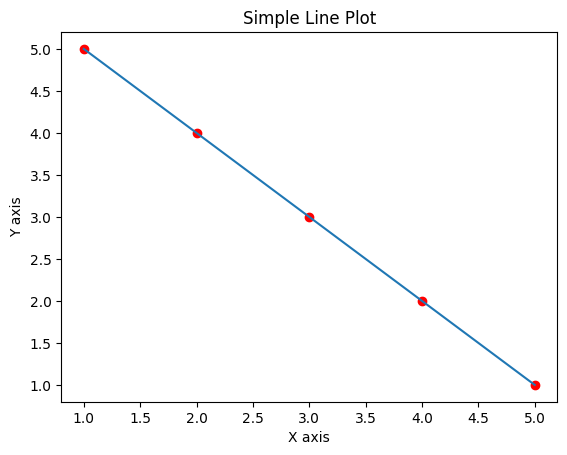

In [85]:
# Linea simple
x = [1,2,3,4,5]
y = [5,4,3,2,1]
plt.plot(x, y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Simple Line Plot")
plt.scatter(x, y, color='red')
plt.show()

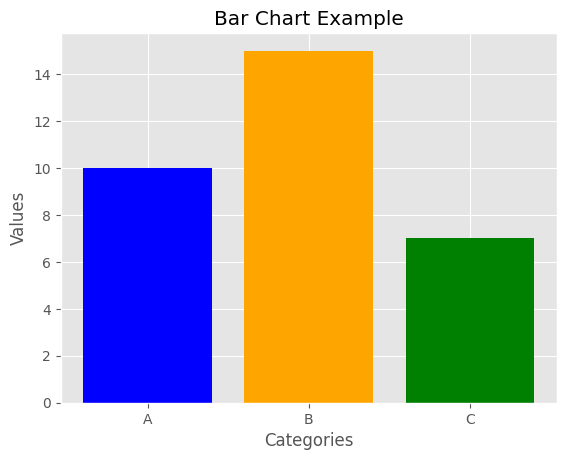

In [88]:
 # Grafico de barras
categories = ['A', 'B', 'C']
values = [10, 15, 7]
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart Example")
plt.show()

In [89]:
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

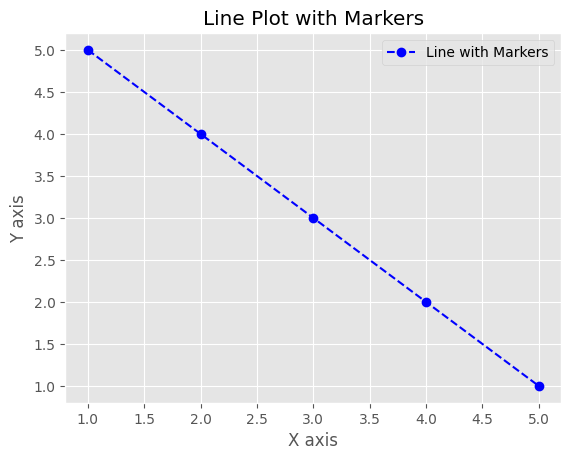

In [91]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]

plt.plot(x, y, marker='o', linestyle='--', color='b', label='Line with Markers')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Line Plot with Markers")
plt.legend()
plt.show()

In [95]:
# Grafico de dispersion
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import requests
from io import StringIO

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
response = requests.get(url, verify=False)
data = pd.read_csv(StringIO(response.text))
data

/Users/jsrnieto/Documents/GitHub/AnalisisDeDatos/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


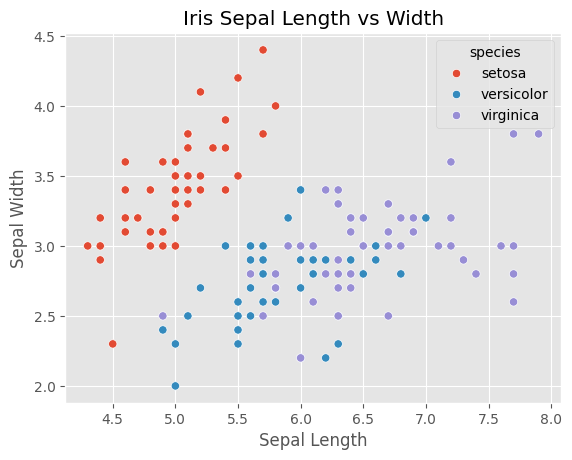

In [97]:
# Grafico de dispersion
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Sepal Length vs Width")
plt.show()

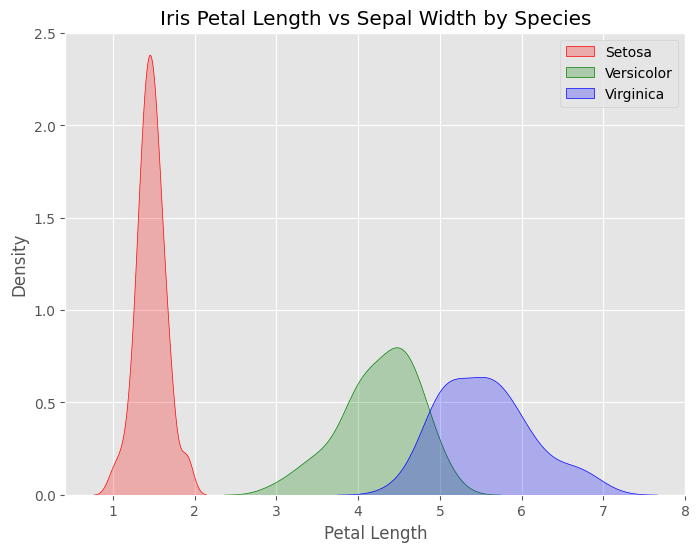

In [102]:
#Grafica de reach plot 
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=setosa["petal_length"], color='r', label='Setosa', ax=ax, fill=True)
sns.kdeplot(data=versicolor["petal_length"], color='g', label='Versicolor', ax=ax, fill=True)
sns.kdeplot(data=virginica["petal_length"], color='b', label='Virginica', ax=ax, fill=True)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Density")
ax.legend(loc='upper right')
ax.set_title("Iris Petal Length vs Sepal Width by Species")
plt.show()

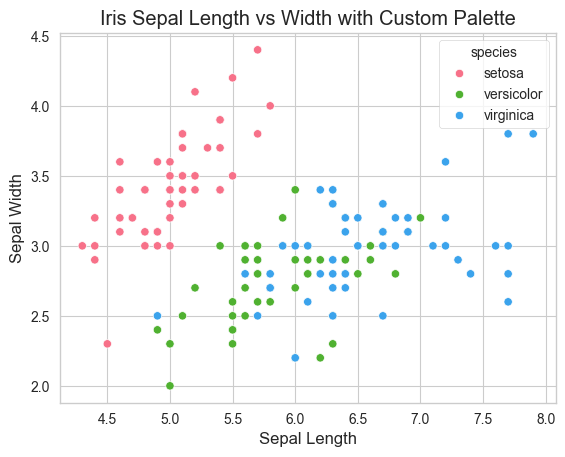

In [103]:
# Grafica de dispersiÃ³n
sns.set_style("whitegrid")
pallet = sns.color_palette("husl", 3)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, palette=pallet)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Sepal Length vs Width with Custom Palette")
plt.show()